<a href="https://colab.research.google.com/github/adarsh-ds-kumar/adarsh-ds-kumar/blob/main/Customer_Churn_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
cat_cols = []
for i in df.columns:
  if df[i].nunique()<=4:
    cat_cols.append(i)
print(cat_cols)

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


In [8]:
for i in cat_cols:
  print(df[i].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-10-1dbbeb455b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i,data=df,order=order,palette="rainbow")


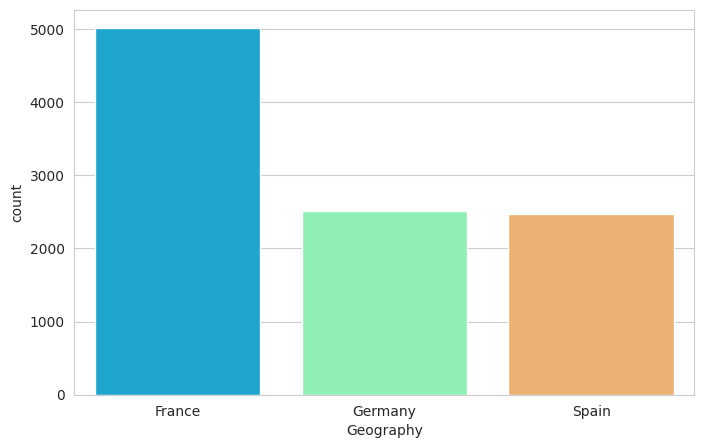

<ipython-input-10-1dbbeb455b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i,data=df,order=order,palette="rainbow")


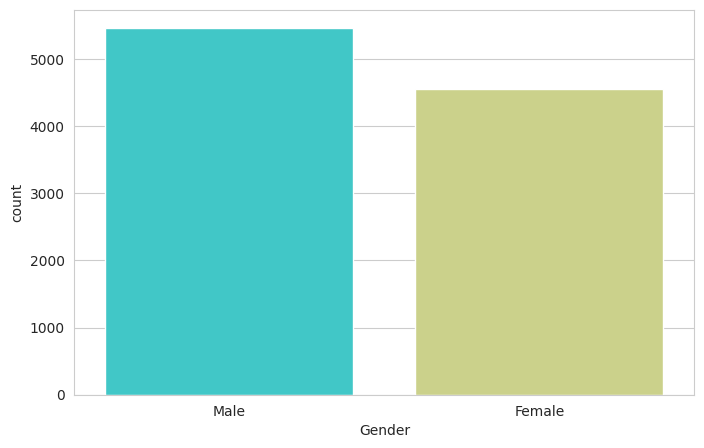

<ipython-input-10-1dbbeb455b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i,data=df,order=order,palette="rainbow")


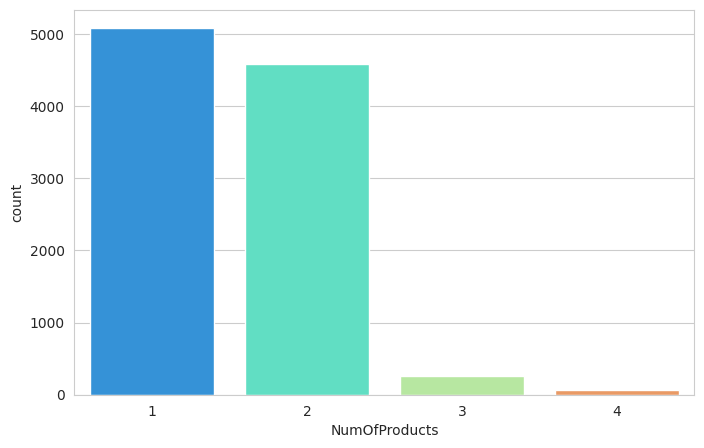

<ipython-input-10-1dbbeb455b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i,data=df,order=order,palette="rainbow")


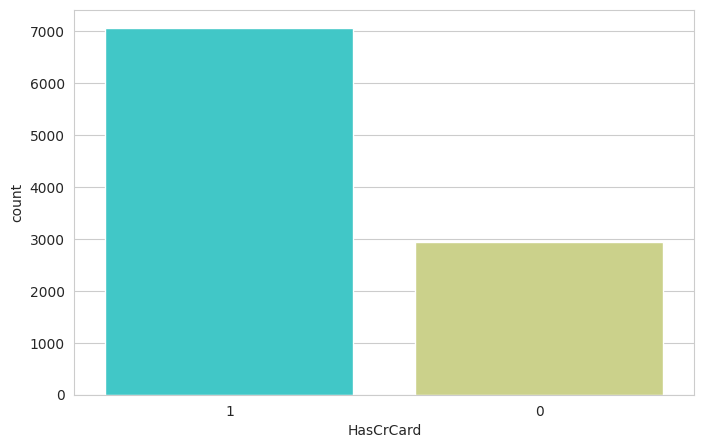

<ipython-input-10-1dbbeb455b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i,data=df,order=order,palette="rainbow")


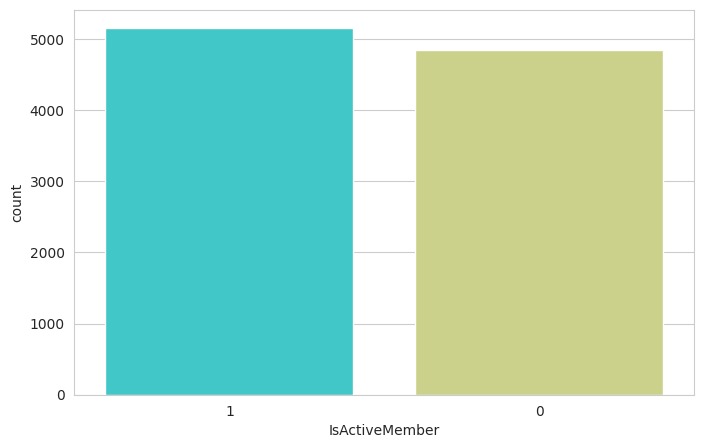

<ipython-input-10-1dbbeb455b60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i,data=df,order=order,palette="rainbow")


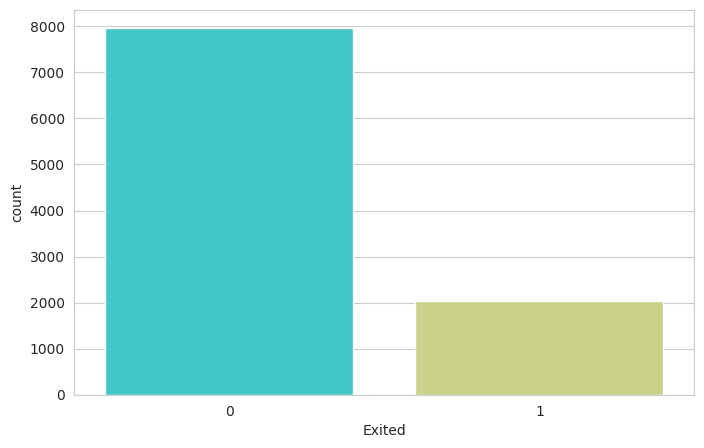

In [10]:
sns.set_style("whitegrid")

for i in cat_cols:
  plt.figure(figsize=(8,5))
  # sns.countplot(x=i,data=df)
  order = df[i].value_counts().index
  sns.countplot(x=i,data=df,order=order,palette="rainbow")
  plt.show()

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
X = pd.get_dummies(df.drop('Exited',axis=1),drop_first=True).astype(int)
y = df['Exited']

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,1
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1


In [14]:
#split data into train and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

In [17]:
#modelling

In [18]:
#initializing the ANN
from keras.models import Sequential
ann = Sequential()

In [19]:
#adding the input layer to the first hidden layer
from keras.layers import Dense
ann.add(Dense(input_dim = 11,units = 11,
              kernel_initializer = "uniform",activation = "relu"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#adding the second hidden layer
ann.add(Dense(units = 11, kernel_initializer='uniform',activation='relu'))

In [21]:
#adding the output layer
ann.add(Dense(units = 1, kernel_initializer='uniform',activation='sigmoid'))

In [22]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#compliling the ANN
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#Train the ANN on Training Set
history = ann.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7890 - loss: 0.6386 - val_accuracy: 0.7975 - val_loss: 0.4451
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7932 - loss: 0.4437 - val_accuracy: 0.7975 - val_loss: 0.4344
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7976 - loss: 0.4287 - val_accuracy: 0.7975 - val_loss: 0.4289
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7951 - loss: 0.4316 - val_accuracy: 0.7975 - val_loss: 0.4250
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8028 - loss: 0.4200 - val_accuracy: 0.8175 - val_loss: 0.4204
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8212 - loss: 0.4270 - val_accuracy: 0.8244 - val_loss: 0.4154
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8313 - loss: 0.4151 - val_accuracy: 0.8244 - val_loss: 0.4129
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8352 - loss: 0.4057 - val_accuracy: 

So, Our model is performing good without Overfitting problem.
First Units was 6 i have changed it to 11 to increase some accuracy and successfully i get some good or improved accuracy.

In [25]:
ann.layers[0].get_weights()   #for 1st layer

[array([[ 1.22477766e-02, -3.01836673e-02,  6.20728824e-03,
          6.36387756e-03,  1.57318354e-01,  1.23874702e-01,
          3.00870296e-02,  5.82655743e-02, -1.07982107e-01,
         -2.55493857e-02, -3.56905945e-02],
        [-4.13853973e-01,  5.51092401e-02,  3.42536032e-01,
          3.65527183e-01, -4.02527094e-01, -6.69034123e-02,
         -4.23506916e-01, -3.55142504e-01, -3.94494265e-01,
         -4.19457942e-01, -4.65144902e-01],
        [-9.13968012e-02,  1.29508257e-01, -3.07020172e-02,
          1.99052304e-01, -1.21633768e-01,  5.22562303e-03,
          6.49187574e-03, -1.38366923e-01,  8.89777988e-02,
          4.54200990e-02,  4.28136215e-02],
        [ 4.18352522e-02, -6.60995990e-02,  3.02806869e-02,
         -8.58159587e-02, -1.81491598e-01, -2.46297255e-01,
          3.74075174e-01, -2.10609540e-01, -9.41503197e-02,
          3.83116677e-02, -1.38369694e-01],
        [ 5.56527004e-02,  5.55684790e-03, -9.30245593e-02,
          5.02765528e-04,  6.48758486e-02, -

In [26]:
ann.layers[1].get_weights()   #for 2nd layer

[array([[-0.01726802,  0.1783203 ,  0.13602719,  0.19286686,  0.20065272,
         -0.01273781,  0.18087879,  0.16451447, -0.8366666 ,  0.13813443,
          0.20455213],
        [-0.05178229,  0.32055354,  0.36020806,  0.31767812,  0.39202195,
          0.00574655,  0.35622865,  0.30894884,  0.02576187,  0.30269793,
          0.2947022 ],
        [-0.01826567,  0.44052872,  0.48714507,  0.43794698,  0.453698  ,
         -0.05357999,  0.4457425 ,  0.51589537, -0.39353856,  0.439474  ,
          0.42050502],
        [-0.03428267,  0.3702986 ,  0.36271575,  0.29223683,  0.36065   ,
          0.00347327,  0.3282972 ,  0.30734286, -0.25998056,  0.3419141 ,
          0.32906824],
        [-0.0421788 ,  0.15790215,  0.21373408,  0.2180363 ,  0.20975856,
         -0.01686379,  0.24020016,  0.23487157, -0.35783076,  0.1696144 ,
          0.16857652],
        [-0.00814986,  0.2161006 ,  0.2777672 ,  0.2288303 ,  0.26387614,
         -0.02581532,  0.19603041,  0.2750207 ,  0.2501276 ,  0.2158999

In [27]:
ann.layers[2].get_weights()

[array([[ 0.02871376],
        [-0.26981577],
        [-0.28678572],
        [-0.27667817],
        [-0.2496016 ],
        [ 0.03017628],
        [-0.24396488],
        [-0.24885952],
        [ 2.4632554 ],
        [-0.2308901 ],
        [-0.23162019]], dtype=float32),
 array([0.13072982], dtype=float32)]

In [28]:
#prediction & Evaluation
y_pred = ann.predict(X_test)

#here we have used sigmoid so its gives output in probability form to change this in normal form we use if value is >0.5 means 1 and vice versa.
#0.5 is assumed threshold value it can be decides using ROC.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_pred = np.where(y_pred > 0.5,1,0)

In [30]:
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [31]:
#evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1536   49]
 [ 283  132]]
0.834
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1585
           1       0.73      0.32      0.44       415

    accuracy                           0.83      2000
   macro avg       0.79      0.64      0.67      2000
weighted avg       0.82      0.83      0.81      2000



In [32]:
history.history

{'accuracy': [0.7939062714576721,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.8110937476158142,
  0.8299999833106995,
  0.8359375,
  0.8364062309265137,
  0.8384374976158142,
  0.839062511920929,
  0.839062511920929,
  0.8396875262260437,
  0.8378124833106995,
  0.8393750190734863,
  0.8392187356948853,
  0.8382812738418579,
  0.8393750190734863,
  0.8423437476158142,
  0.8418750166893005,
  0.83984375,
  0.8417187333106995,
  0.8401562571525574,
  0.8407812714576721,
  0.8410937786102295,
  0.8418750166893005,
  0.83984375,
  0.8407812714576721,
  0.8415625095367432,
  0.8407812714576721,
  0.8395312428474426,
  0.8412500023841858,
  0.8418750166893005,
  0.8404687643051147,
  0.8401562571525574,
  0.8421875238418579,
  0.842968761920929,
  0.8428124785423279,
  0.8414062261581421,
  0.8417187333106995,
  0.8415625095367432,
  0.8417187333106995,
  0.8434374928474426,
  0.8423437476158142,
  0.842968761920929,
  0.8420312404632568,
  0.8432812690734863,
  0.8

**Here We got 86 percent accuracy**

```
# This is formatted as code
```

**

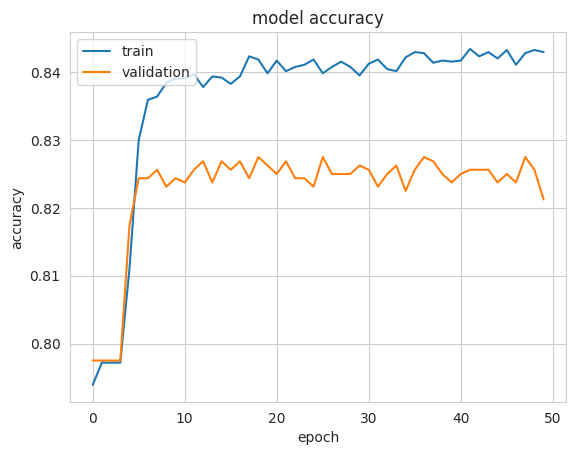

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

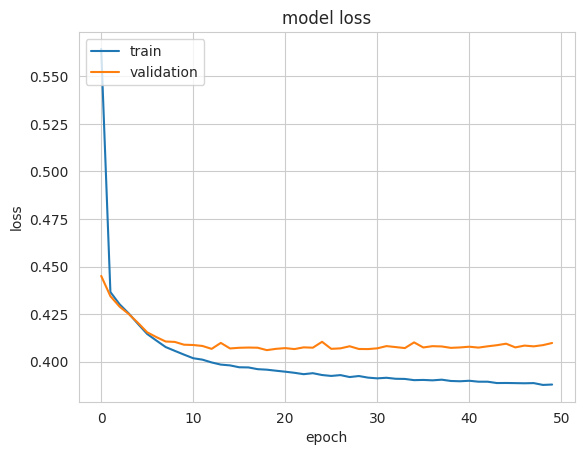

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [44]:
#Now tuning
import keras_tuner as kt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(Dense(hp.Int('units', min_value=64, max_value=128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.3, step=0.05)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', [0.01, 0.001, 0.0001])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

#tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10)
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=10,
                        directory='new1_tuning_session')  # Change name
tuner.search(X_train, y_train, epochs=10, validation_data=(X, y))

Trial 10 Complete [00h 00m 17s]
val_accuracy: 0.7962999939918518

Best val_accuracy So Far: 0.7962999939918518
Total elapsed time: 00h 03m 12s
